# Homework 3: Prediction and Classification

Due: Thursday, October 16, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW3.ipynb download=HW3.ipynb> Download this assignment</a>

#### Submission Instructions
To submit your homework, create a folder named lastname_firstinitial_hw# and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code. Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. If we cannot access your work because these directions are not followed correctly, we will not grade your work.

---


# Introduction

In this assignment you will be using regression and classification to explore different data sets.  

**First**: You will use data from before 2002 in the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) to create a metric for picking baseball players using linear regression. This is same database we used in Homework 1. This database contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more". [Documentation provided here](http://seanlahman.com/files/database/readme2012.txt).

!["Sabermetrics Science"](http://saberseminar.com/wp-content/uploads/2012/01/saber-web.jpg)
http://saberseminar.com/wp-content/uploads/2012/01/saber-web.jpg

**Second**: You will use the famous [iris](http://en.wikipedia.org/wiki/Iris_flower_data_set) data set to perform a $k$-neareast neighbor classification using cross validation.  While it was introduced in 1936, it is still [one of the most popular](http://archive.ics.uci.edu/ml/) example data sets in the machine learning community. Wikipedia describes the data set as follows: "The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres." Here is an illustration what the four features measure:

!["iris data features"](http://sebastianraschka.com/Images/2014_python_lda/iris_petal_sepal.png)
http://sebastianraschka.com/Images/2014_python_lda/iris_petal_sepal.png

**Third**: You will investigate the influence of higher dimensional spaces on the classification using another standard data set in machine learning called the The [digits data set](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).  This data set is similar to the MNIST data set discussed in the lecture. The main difference is, that each digit is represented by an 8x8 pixel image patch, which is considerably smaller than the 28x28 pixels from MNIST. In addition, the gray values are restricted to 16 different values (4 bit), instead of 256 (8 bit) for MNIST. 

**Finally**: In preparation for Homework 4, we want you to read through the following articles related to predicting the 2014 Senate Midterm Elections. 

* [Nate Silver's Methodology at while at NYT](http://fivethirtyeight.blogs.nytimes.com/methodology/)
* [How The FiveThirtyEight Senate Forecast Model Works](http://fivethirtyeight.com/features/how-the-fivethirtyeight-senate-forecast-model-works/)
* [Pollster Ratings v4.0: Methodology](http://fivethirtyeight.com/features/pollster-ratings-v40-methodology/)
* [Pollster Ratings v4.0: Results](http://fivethirtyeight.com/features/pollster-ratings-v40-results/)
* [Nate Silver versus Sam Wang](http://www.washingtonpost.com/blogs/plum-line/wp/2014/09/17/nate-silver-versus-sam-wang/)
* [More Nate Silver versus Sam Wang](http://www.dailykos.com/story/2014/09/09/1328288/-Get-Ready-To-Rumbllllle-Battle-Of-The-Nerds-Nate-Silver-VS-Sam-Wang)
* [Nate Silver explains critisims of Sam Wang](http://politicalwire.com/archives/2014/10/02/nate_silver_rebuts_sam_wang.html)
* [Background on the feud between Nate Silver and Sam Wang](http://talkingpointsmemo.com/dc/nate-silver-sam-wang-feud)
* [Are there swing voters?]( http://www.stat.columbia.edu/~gelman/research/unpublished/swing_voters.pdf)



---

## Load Python modules

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
import StringIO
import zipfile
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 

# If this module is not already installed, you may need to install it. 
# You can do this by typing 'pip install seaborn' in the command line
import seaborn as sns 

import sklearn
import sklearn.datasets
import sklearn.cross_validation
import sklearn.decomposition
import sklearn.grid_search
import sklearn.neighbors
import sklearn.metrics

# Problem 1: Sabermetrics

Using data preceding the 2002 season pick 10 offensive players keeping the payroll under $20 million (assign each player the median salary). Predict how many games this team would win in a 162 game season.  

In this problem we will be returning to the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) that we used in Homework 1.  From this database, we will be extract five data sets containing information such as yearly stats and standing, batting statistics, fielding statistics, player names, player salaries and biographical information. You will explore the data in this database from before 2002 and create a metric for picking players. 

#### Problem 1(a) 

Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Teams.csv', 'Batting.csv', 'Salaries.csv', 'Fielding.csv', 'Master.csv' tables. Read these tables into separate pandas DataFrames with the following names. 

CSV file name | Name of pandas DataFrame
:---: | :---: 
Teams.csv | teams
Batting.csv | players
Salaries.csv | salaries
Fielding.csv | fielding
Master.csv | master

In [2]:
### Your code here ###
req=requests.get("http://seanlahman.com/files/database/lahman-csv_2015-01-24.zip")
zipf = zipfile.ZipFile(StringIO.StringIO(req.content))
teams = pd.read_csv(zipf.open('Teams.csv'))
players = pd.read_csv(zipf.open('Batting.csv'))
salaries = pd.read_csv(zipf.open('Salaries.csv'))
fielding = pd.read_csv(zipf.open('Fielding.csv'))
master = pd.read_csv(zipf.open('Master.csv'))

#### Problem 1(b)

Calculate the median salary for each player and create a pandas DataFrame called `medianSalaries` with four columns: (1) the player ID, (2) the first name of the player, (3) the last name of the player and (4) the median salary of the player. Show the head of the `medianSalaries` DataFrame.   

In [3]:
### Your code here ###
mean_salaries = salaries.groupby('playerID')['playerID','salary'].median()
master.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,205.0,75.0,R,R,4/6/2004,9/28/2013,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,4/13/1954,10/3/1976,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,4/10/1962,9/26/1971,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,7/26/1977,10/3/1990,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,9/10/2001,4/13/2006,abada001,abadan01


In [4]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [5]:
mean_salaries

,salary
playerID,
aardsda01,419000
aasedo01,612500
abadan01,327000
abadfe01,485000
abbotje01,255000
abbotji01,1850000
abbotku01,500000
abbotky01,129500
abbotpa01,285000


In [6]:
median_salaries = pd.merge(master[['playerID','nameLast','nameFirst']], mean_salaries, left_on='playerID', right_index = True, how="inner")
median_salaries.head()

,playerID,nameLast,nameFirst,salary
0,aardsda01,Aardsma,David,419000
3,aasedo01,Aase,Don,612500
4,abadan01,Abad,Andy,327000
5,abadfe01,Abad,Fernando,485000
13,abbotje01,Abbott,Jeff,255000


In [7]:
games = teams[(teams.yearID>1946) & (teams.G==162)]
games.head()


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
1366,1961,AL,KC1,OAK,NaN,9,162,80.0,61,100,...,160.0,0.97,Kansas City Athletics,Municipal Stadium I,683817.0,101,103,KCA,KC1,KC1
1367,1961,AL,LAA,ANA,NaN,8,162,82.0,70,91,...,154.0,0.96,Los Angeles Angels,Wrigley Field (LA),603510.0,111,112,LAA,LAA,LAA
1377,1962,AL,BAL,BAL,NaN,7,162,82.0,77,85,...,152.0,0.98,Baltimore Orioles,Memorial Stadium,790254.0,94,93,BAL,BAL,BAL
1379,1962,AL,CHA,CHW,NaN,5,162,81.0,85,77,...,153.0,0.98,Chicago White Sox,Comiskey Park,1131562.0,100,99,CHW,CHA,CHA
1380,1962,NL,CHN,CHC,NaN,9,162,81.0,59,103,...,171.0,0.97,Chicago Cubs,Wrigley Field,609802.0,104,105,CHC,CHN,CHN


In [8]:
games['1B']=games.H - (games['2B']+games['3B']+games['HR'])
games["PA"] = games.BB + games.AB
games.head()
for col in ['1B','2B','3B','HR','BB']:
    games[col]=games[col]/games.PA

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [9]:
games = games[['teamID','yearID','W','1B','2B','3B','HR','BB','PA']]
games.head()

,teamID,yearID,W,1B,2B,3B,HR,BB,PA
1366,KC1,1961,61,0.164751,0.035982,0.007829,0.014993,0.096618,6003
1367,LAA,1961,70,0.147748,0.035708,0.003604,0.030958,0.111548,6105
1377,BAL,1962,77,0.157816,0.037456,0.005660,0.025970,0.085900,6007
1379,CHA,1962,85,0.165797,0.040756,0.009129,0.014998,0.101076,6134
1380,CHN,1962,59,0.168930,0.032461,0.009275,0.020868,0.083471,6038


#### Problem 1(c)

Now, consider only team/season combinations in which the teams played 162 Games. Exclude all data from before 1947. Compute the per plate appearance rates for singles, doubles, triples, HR, and BB. Create a new pandas DataFrame called `stats` that has the teamID, yearID, wins and these rates.

**Hint**: Singles are hits that are not doubles, triples, nor HR. Plate appearances are base on balls plus at bats.

In [10]:
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [11]:
teams['3B']

0       37
1       21
2       40
3        8
4       21
5       27
6       25
7       34
8       26
9       35
10       6
11      10
12      31
13       6
14       8
15      13
16      23
17      11
18       3
19       2
20      39
21       0
22      27
23      46
24       8
25      41
26      22
27      20
28      25
29       8
        ..
2745    47
2746    22
2747    16
2748    20
2749    32
2750    31
2751    20
2752    23
2753    41
2754    26
2755    19
2756    29
2757    31
2758    38
2759    36
2760    28
2761    27
2762    26
2763    19
2764    33
2765    27
2766    30
2767    30
2768    32
2769    42
2770    21
2771    24
2772    28
2773    24
2774    27
Name: 3B, dtype: int64

In [12]:
### Your code here ###

#### Problem 1(d)

Is there a noticeable time trend in the rates computed computed in Problem 1(c)? 

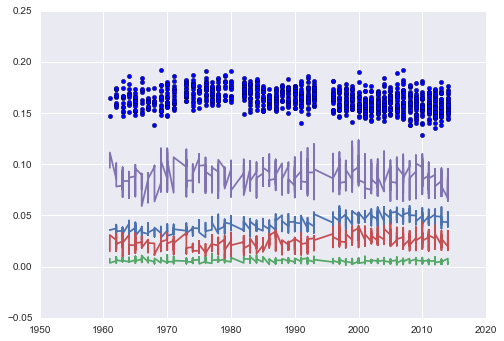

In [13]:
### Your code here ###
plt.scatter(games.yearID, games['1B'])
plt.plot(games.yearID, games['2B'])
plt.plot(games.yearID, games['3B'])
plt.plot(games.yearID, games['HR'])
plt.plot(games.yearID, games['BB'])

#### Problem 1(e) 

Using the `stats` DataFrame from Problem 1(c), adjust the singles per PA rates so that the average across teams for each year is 0. Do the same for the doubles, triples, HR, and BB rates. 

In [14]:
### Your code here ###
games_norm = games.copy()
games_norm[['1B','2B','3B','HR','BB']] = games[['1B','2B','3B','HR','BB']].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
games_norm.head()

,teamID,yearID,W,1B,2B,3B,HR,BB,PA
1366,KC1,1961,61,0.019077,-0.218314,0.205980,-0.270526,0.144714,6003
1367,LAA,1961,70,-0.246208,-0.226571,-0.178366,0.189468,0.376765,6105
1377,BAL,1962,77,-0.089125,-0.173817,0.008673,0.045742,-0.021885,6007
1379,CHA,1962,85,0.035400,-0.074211,0.324220,-0.270357,0.213999,6134
1380,CHN,1962,59,0.084280,-0.324584,0.337422,-0.101250,-0.059630,6038


#### Problem 1(f)

Build a simple linear regression model to predict the number of wins from the average adjusted singles, double, triples, HR, and BB rates. To decide which of these terms to include fit the model to data from 2002 and compute the average squared residuals from predictions to years past 2002. Use the fitted model to define a new sabermetric summary: offensive predicted wins (OPW). Hint: the new summary should be a linear combination of one to five of the five rates.


In [15]:
### Your code here ###
games_norm2 = games_norm[games_norm.yearID>2001]
games_norm2.head()
X=games_norm2.loc[:,['1B','2B','3B','HR','BB']]
y=games_norm2.W

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

In [16]:
from sklearn.metrics import mean_squared_error
est = LinearRegression()
model = est.fit(Xtrain,ytrain)
pred = est.predict(Xtest)
err = mean_squared_error(ytest, pred)

In [17]:
err

93.953833522524846

** Your answer here: **

#### Problem 1(g)

Now we will create a similar database for individual players. Consider only player/year combinations in which the player had at least 500 plate appearances. Consider only the years we considered for the calculations above (after 1947 and seasons with 162 games). For each player/year compute singles, doubles, triples, HR, BB per plate appearance rates. Create a new pandas DataFrame called `playerstats` that has the playerID, yearID and the rates of these stats.  Remove the average for each year as for these rates as done in Problem 1(e). 

In [18]:
### Your code here ###
subplayers = players[(players.AB+players.BB >=500) & (players.G==162) & (players.yearID>1946)]
subplayers["1B"] = subplayers.H - subplayers["2B"] - subplayers["3B"] - subplayers["HR"]
subplayers["PA"] = subplayers.BB + subplayers.AB
for i in ["1B","2B","3B","HR","BB"]:
    subplayers[i]=subplayers[i]/subplayers.PA
playerstats=subplayers[['playerID','yearID',"1B","2B","3B","HR","BB"]].copy()
playerstats.head()


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

,playerID,yearID,1B,2B,3B,HR,BB
41776,richabo01,1961,0.213873,0.024566,0.007225,0.004335,0.043353
41929,woodja01,1961,0.178918,0.023578,0.019417,0.015257,0.080444
42065,cepedor01,1962,0.194864,0.039275,0.001511,0.052870,0.055891
42387,mayswi01,1962,0.141631,0.051502,0.007153,0.070100,0.111588
42521,robinbr01,1962,0.193787,0.042899,0.013314,0.034024,0.062130


Show the head of the `playerstats` DataFrame. 

In [19]:
### Your code here ###
def normalize(df):
    subRates = df[["1B","2B","3B","HR","BB"]]
    df[["1B","2B","3B","HR","BB"]] = subRates - subRates.mean(axis=0)
    return df
playerstats =playerstats.groupby('yearID').apply(normalize)
playerstats.head()


,playerID,yearID,1B,2B,3B,HR,BB
41776,richabo01,1961,0.017477,0.000494,-0.006096,-0.005461,-0.018546
41929,woodja01,1961,-0.017477,-0.000494,0.006096,0.005461,0.018546
42065,cepedor01,1962,0.024062,-0.006264,-0.005044,0.007112,-0.042883
42387,mayswi01,1962,-0.029171,0.005963,0.000599,0.024342,0.012813
42521,robinbr01,1962,0.022985,-0.002640,0.006759,-0.011735,-0.036644


#### Problem 1(h)

Using the `playerstats` DataFrame created in Problem 1(g), create a new DataFrame called `playerLS` containing the player's lifetime stats. This DataFrame should contain the playerID, the year the player's career started, the year the player's career ended and the player's lifetime average for each of the quantities (singles, doubles, triples, HR, BB). For simplicity we will simply compute the avaerage of the rates by year (a more correct way is to go back to the totals). 

In [20]:
### Your code here ###
grouped = playerstats.groupby('playerID')
playerLS =grouped[['playerID','1B','2B','3B','HR','BB']].agg(np.mean).reset_index()
playerLS=master[['playerID','debut','finalGame']].merge(playerLS, how='inner',on='playerID')
playerLS.debut = playerLS.debut.map(lambda x: int(x[-4:]))
playerLS.finalGame = playerLS.finalGame.map(lambda x: int(x[-4:]))
playerLS.head()

,playerID,debut,finalGame,1B,2B,3B,HR,BB
0,abreubo01,1996,2014,-0.022295,0.008226,-0.002379,-0.003980,0.054759
1,allendi01,1963,1977,-0.005771,0.016424,0.009082,0.014189,0.012272
2,alomasa01,1964,1978,0.011155,-0.008823,-0.002639,-0.012807,-0.030193
3,alouma01,1960,1974,0.078618,0.017006,0.003056,-0.034643,-0.065462
4,bagweje01,1991,2005,-0.026475,0.008020,-0.001249,0.012158,0.054203


Show the head of the `playerLS` DataFrame. 

In [21]:
### Your code here ###

#### Problem 1(i)

Compute the OPW for each player based on the average rates in the `playerLS` DataFrame. You can interpret this summary statistic as the predicted wins for a team with 9 batters exactly like the player in question. Add this column to the playerLS DataFrame. Call this colum OPW.

In [22]:
### Your code here ###
playerLS['OPW'] = est.predict(playerLS[['1B','2B','3B','HR','BB']])
playerLS.head()

,playerID,debut,finalGame,1B,2B,3B,HR,BB,OPW
0,abreubo01,1996,2014,-0.022295,0.008226,-0.002379,-0.003980,0.054759,81.627509
1,allendi01,1963,1977,-0.005771,0.016424,0.009082,0.014189,0.012272,81.413611
2,alomasa01,1964,1978,0.011155,-0.008823,-0.002639,-0.012807,-0.030193,79.928380
3,alouma01,1960,1974,0.078618,0.017006,0.003056,-0.034643,-0.065462,80.189067
4,bagweje01,1991,2005,-0.026475,0.008020,-0.001249,0.012158,0.054203,81.925681


#### Problem 1(j)

Add four columns to the `playerLS` DataFrame that contains the player's position (C, 1B, 2B, 3B, SS, LF, CF, RF, or OF), first name, last name and median salary. 

In [23]:
### Your code here ###

from collections import defaultdict

def find_pos(df):
    positions = df.POS
    d = defaultdict(int)
    for pos in positions:
        d[pos] += 1
    result = max(d.iteritems(), key=lambda x: x[1])
    return result[0]

positions_df = fielding.groupby("playerID").apply(find_pos)
positions_df = positions_df.reset_index()
positions_df = positions_df.rename(columns={0:"POS"})

Show the head of the `playerLS` DataFrame. 

In [24]:
### Your code here ###
playerLS_merged = positions_df.merge(playerLS, how='inner', on="playerID")
playerLS_merged = playerLS_merged.merge(median_salaries, how='inner', on=['playerID'])
playerLS_merged.head()

,playerID,POS,debut,finalGame,1B,2B,3B,HR,BB,OPW,nameLast,nameFirst,salary
0,abreubo01,OF,1996,2014,-0.022295,0.008226,-0.002379,-0.003980,0.054759,81.627509,Abreu,Bobby,9000000
1,bagweje01,1B,1991,2005,-0.026475,0.008020,-0.001249,0.012158,0.054203,81.925681,Bagwell,Jeff,6875000
2,bayja01,OF,2003,2013,-0.023686,0.011852,0.002115,0.008111,0.037311,81.461449,Bay,Jason,4750000
3,baylodo01,DH,1970,1988,-0.018590,0.004053,-0.002398,0.020579,0.027008,81.610458,Baylor,Don,695909
4,bellbu01,3B,1972,1989,0.014034,0.016843,-0.002404,-0.005209,-0.031709,80.261613,Bell,Buddy,830454


#### Problem 1(k)

Subset the `playerLS` DataFrame for players active in 2002 and 2003 and played at least three years. Plot and describe the relationship bewteen the median salary (in millions) and the predicted number of wins. 

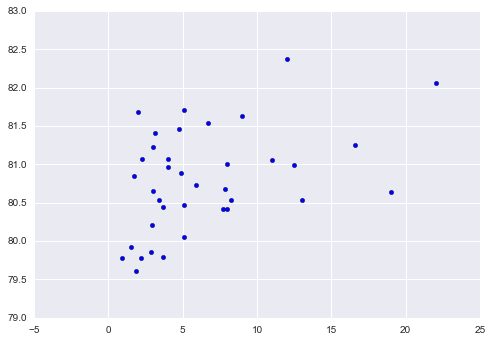

In [25]:
### Your code here ###
active = playerLS_merged[(playerLS_merged["debut"] <= 2005) & \
                         (playerLS_merged["finalGame"] >= 2006) & \
                         (playerLS_merged["finalGame"] - playerLS_merged["debut"] >= 3)  ]

plt.scatter(active.salary/10**6,active.OPW)

#### Problem 1(l)
Pick one players from one of each of these 10 position C, 1B, 2B, 3B, SS, LF, CF, RF, DH, or OF keeping the total median salary of all 10 players below 20 million. Report their averaged predicted wins and total salary.

In [26]:
### Your code here ###

#### Problem 1(m)
What do these players outperform in? Singles, doubles, triples HR or BB?

In [27]:
### Your code here ###

** Your answer here: **

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---

# Problem 2:  $k$-Nearest Neighbors and Cross Validation 

What is the optimal $k$ for predicting species using $k$-nearest neighbor classification 
on the four features provided by the iris dataset.

In this problem you will get to know the famous iris data set, and use cross validation to select the optimal $k$ for a $k$-nearest neighbor classification. This problem set makes heavy use of the [sklearn](http://scikit-learn.org/stable/) library. In addition to Pandas, it is one of the most useful libraries for data scientists! After completing this homework assignment you will know all the basics to get started with your own machine learning projects in sklearn. 

Future lectures will give further background information on different classifiers and their specific strengths and weaknesses, but when you have the basics for sklearn down, changing the classifier will boil down to exchanging one to two lines of code.

The data set is so popular, that sklearn provides an extra function to load it:

In [28]:
#load the iris data set
iris = sklearn.datasets.load_iris()

X = iris.data  
Y = iris.target
X_train, X_test, y_train, y_test = train_test_split( iris.data, iris.target, test_size=0.33, random_state=42)
print X_train.shape, y_train.shape

(100L, 4L) (100L,)


#### Problem 2(a) 
Split the data into a train and a test set. Use a random selection of 33% of the samples as test data. Sklearn provides the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) function for this purpose. Print the dimensions of all the train and test data sets you have created. 

In [29]:
### Your code here ###
X_train, X_test, y_train, y_test = train_test_split( iris.data, iris.target, test_size=0.33, random_state=42)
print X_train.shape, y_train.shape

(100L, 4L) (100L,)


#### Problem 2(b)

Examine the data further by looking at the projections to the first two principal components of the data. Use the [`TruncatedSVD`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) function for this purpose, and create a scatter plot. Use the colors on the scatter plot to represent the different classes in the target data. 

0.974979998661


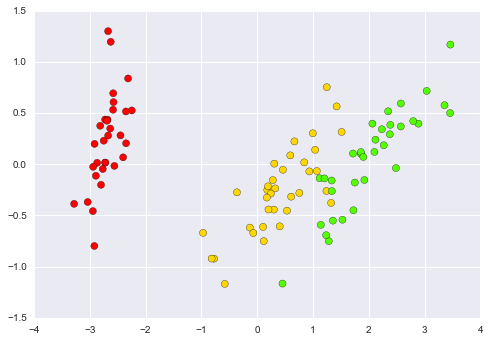

In [30]:
### Your code here ###
from sklearn.decomposition import PCA, TruncatedSVD

pca=PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
print pca.explained_variance_ratio_.sum()
svd = TruncatedSVD(n_components=2)
X_svd=svd.fit_transform(X_train - np.mean(X_train, axis=0))
svd.explained_variance_ratio_.sum()
#plt.imshow(svd.components_[0])
plt.scatter(X_svd[:,0], X_svd[:,1],s=50, c = y_train,cmap=plt.cm.prism) 
plt.show() 

In [31]:
X_svd.shape

(100L, 2L)

#### Problem 2(c) 

In the lecture we discussed how to use cross validation to estimate the optimal value for $k$ (the number of nearest neighbors to base the classification on). Use ***ten fold cross validation*** to estimate the optimal value for $k$ for the iris data set. 

**Note**: For your convenience sklearn does not only include the [KNN classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), but also a [grid search function](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV). The function is called grid search, because if you have to optimize more than one parameter, it is common practice to define a range of possible values for each parameter. An exhaustive search then runs over the complete grid defined by all the possible parameter combinations. This can get very computation heavy, but luckily our KNN classifier only requires tuning of a single parameter for this problem set. 

In [55]:
### Your code here ###
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k=np.arange(1,51,1)
params = {'n_neighbors':k}
gs = GridSearchCV(knn, param_grid=params, cv=10)
gs.fit(X_train,y_train)
gs.best_params_, gs.best_estimator_, gs.best_score_, gs.grid_scores_
#print gs.iter().cv_validation_scores_
help(gs)

Help on GridSearchCV in module sklearn.grid_search object:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      A object of that type is instantiated for each grid point.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``scoring`` must be passed.
 |  
 |  param_grid : dict or list of dictionaries

2

True
0.942525252525
True
0.935101010101
True
0.943282828283
True
0.951262626263
True
0.951616161616
True
0.934191919192
True
0.952525252525
True
0.944191919192
True
0.944191919192
True
0.944191919192
True
0.942525252525
True
0.934191919192
True
0.934191919192
True
0.944191919192
True
0.942525252525
True
0.934191919192
True
0.942525252525
True
0.932525252525
True
0.942525252525
True
0.933434343434
True
0.942525252525
True
0.922323232323
True
0.931414141414
True
0.933080808081
True
0.950505050505
True
0.932323232323
True
0.912121212121
True
0.900101010101
True
0.909191919192
True
0.900101010101
True
0.89101010101
True
0.911212121212
True
0.900101010101
True
0.900101010101
True
0.909191919192
True
0.911212121212
True
0.900101010101
True
0.902878787879
True
0.891767676768
True
0.891767676768
True
0.902878787879
True
0.891767676768
True
0.891767676768
True
0.882676767677
True
0.882676767677
True
0.882676767677
True
0.882676767677
True
0.882676767677
True
0.871565656566
True
0.882676767677


(0.93, 0.96)

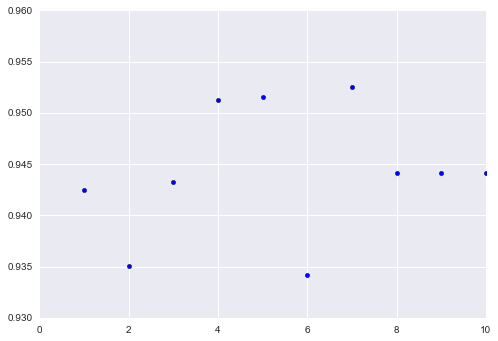

#### Problem 2(d)

Visualize the result by plotting the score results versus values for $k$. 

(0.93, 0.96)

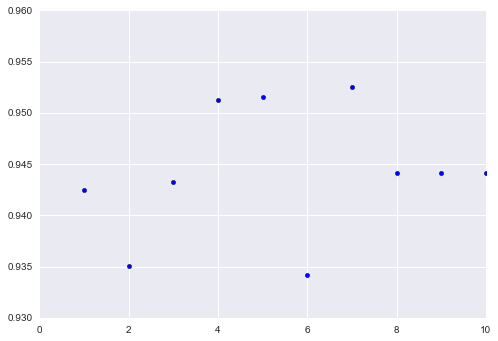

In [86]:
### Your code here ###
k=np.arange(1,50,1)
for score in gs.grid_scores_:
    plt.scatter(score[0].get('n_neighbors'),score.cv_validation_scores.mean())
    #print (score[2]==score.cv_validation_scores).all()
    #print np.mean(score[2])
plt.xlim([0,10])
plt.ylim([0.93,0.96])
# http://stackoverflow.com/questions/35706433/evaluating-mean-stddev-of-cross-validation-scores-in-scikit-learn-gridsearchcv?rq=1
#help(gs.grid_scores_[0])



In [ ]:
KNeighborsClassifier?

Verify that the grid search has indeed chosen the right parameter value for $k$.

In [ ]:
### Your code here ###
# http://stackoverflow.com/questions/35706433/evaluating-mean-stddev-of-cross-validation-scores-in-scikit-learn-gridsearchcv?rq=1


#### Problem 2(e)

Test the performance of our tuned KNN classifier on the test set.

In [87]:
### Your code here ###
sklearn.metrics.accuracy_score(y_test, gs.predict(X_test))


0.97999999999999998

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---

# Problem 3: The Curse and Blessing of Higher Dimensions

In this problem we will investigate the influence of higher dimensional spaces on the classification. The data set is again one of the standard data sets from sklearn. The [digits data set](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) is similar to the MNIST data set discussed in the lecture. The main difference is, that each digit is represented by an 8x8 pixel image patch, which is considerably smaller than the 28x28 pixels from MNIST. In addition, the gray values are restricted to 16 different values (4 bit), instead of 256 (8 bit) for MNIST. 

First we again load our data set.

In [88]:
digits = sklearn.datasets.load_digits()

X = digits.data  
Y = digits.target

print X.shape, Y.shape

(1797L, 64L) (1797L,)


#### Problem 3(a) 

Start with the same steps as in Problem 2. Split the data into train and test set. Use 33% of the samples as test data. Print the dimensions of all the train and test data sets you created. 

In [90]:
### Your code here ###
X_train, X_test, y_train, y_test = train_test_split( digits.data, digits.target, test_size=0.33, random_state=42)
print X_train.shape, y_train.shape

(1203L, 64L) (1203L,)


#### Problem 3(b) 

Similar to Problem 2(b), create a scatter plot of the projections to the first two PCs.  Use the colors on the scatter plot to represent the different classes in the target data. How well can we separate the classes?

**Hint**: Use a `Colormap` in matplotlib to represent the diferent classes in the target data. 

0.286170579689


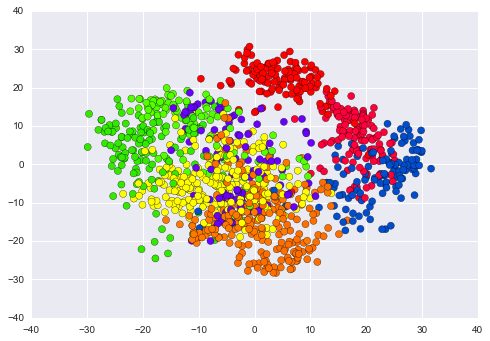

In [91]:
### Your code here ###
from sklearn.decomposition import PCA, TruncatedSVD

pca=PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
print pca.explained_variance_ratio_.sum()
svd = TruncatedSVD(n_components=2)
X_svd=svd.fit_transform(X_train - np.mean(X_train, axis=0))
svd.explained_variance_ratio_.sum()
#plt.imshow(svd.components_[0])
plt.scatter(X_svd[:,0], X_svd[:,1],s=50, c = y_train,cmap=plt.cm.prism) 
plt.show() 

Create individual scatter plots using only two classes at a time to explore which classes are most difficult to distinguish in terms of class separability.  You do not need to create scatter plots for all pairwise comparisons, but at least show one. 

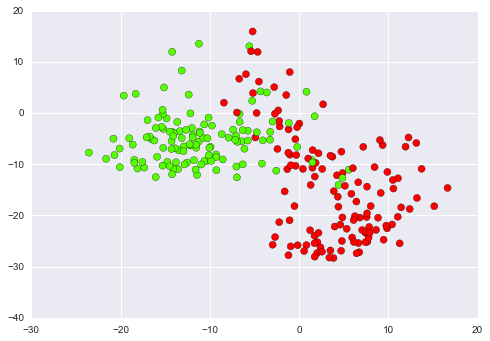

In [94]:
### Your code here ###
plt.scatter(X_svd[(y_train==1)|(y_train==2),0], X_svd[(y_train==1)|(y_train==2),1],s=50, c = y_train[(y_train==1)|(y_train==2)],cmap=plt.cm.prism) 


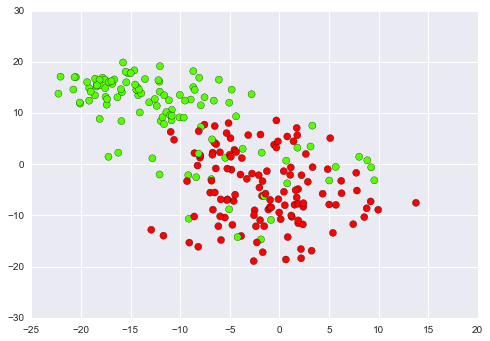

In [95]:
plt.scatter(X_svd[(y_train==8)|(y_train==9),0], X_svd[(y_train==8)|(y_train==9),1],s=50, c = y_train[(y_train==8)|(y_train==9)],cmap=plt.cm.prism) 


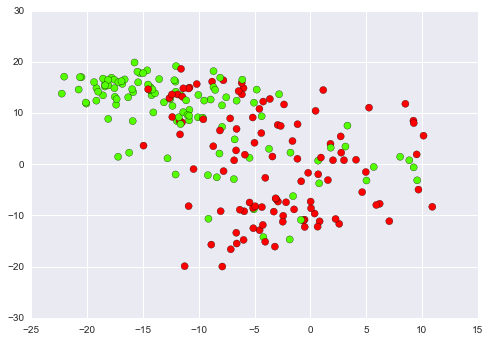

In [96]:
plt.scatter(X_svd[(y_train==5)|(y_train==9),0], X_svd[(y_train==5)|(y_train==9),1],s=50, c = y_train[(y_train==5)|(y_train==9)],cmap=plt.cm.prism) 


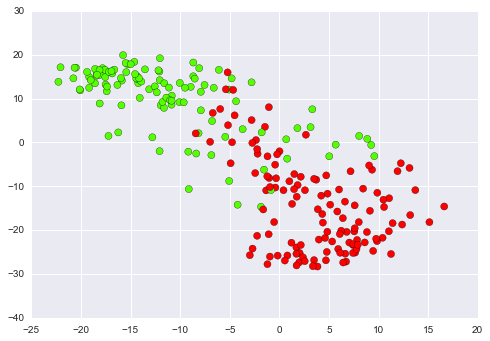

In [97]:
plt.scatter(X_svd[(y_train==1)|(y_train==9),0], X_svd[(y_train==1)|(y_train==9),1],s=50, c = y_train[(y_train==1)|(y_train==9)],cmap=plt.cm.prism) 


Give a brief interpretation of the scatter plot. Which classes look like hard to distinguish? Do both feature dimensions contribute to the class separability? 

** Your answer here: **

#### Problem 3(c) 

Write a **ten-fold cross validation** to estimate the optimal value for $k$ for the digits data set. *However*, this time we are interested in the influence of the number of dimensions we project the data down as well. 

Extend the cross validation as done for the iris data set, to optimize $k$ for different dimensional projections of the data. Create a boxplot showing test scores for the optimal $k$ for each $d$-dimensional subspace with $d$ ranging from one to ten. The plot should have the scores on the y-axis and the different dimensions $d$ on the x-axis. You can use your favorite plot function for the boxplots. [Seaborn](http://web.stanford.edu/~mwaskom/software/seaborn/index.html) is worth having a look at though. It is a great library for statistical visualization and of course also comes with a [`boxplot`](http://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html) function that has simple means for changing the labels on the x-axis.

In [116]:
### Your cross validation and evaluation code here ###
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k=np.arange(1,11,1)
params = {'n_neighbors':k}
gs = GridSearchCV(knn, param_grid=params, cv=10)
gs.fit(X_svd,y_train)
gs.best_params_, gs.best_estimator_, gs.best_score_, gs.grid_scores_

({'n_neighbors': 7},
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=7, p=2,
            weights='uniform'),
 0.62842892768079806,
 [mean: 0.55611, std: 0.04245, params: {'n_neighbors': 1},
  mean: 0.55943, std: 0.03524, params: {'n_neighbors': 2},
  mean: 0.57938, std: 0.03528, params: {'n_neighbors': 3},
  mean: 0.60349, std: 0.03363, params: {'n_neighbors': 4},
  mean: 0.61513, std: 0.02666, params: {'n_neighbors': 5},
  mean: 0.62178, std: 0.03549, params: {'n_neighbors': 6},
  mean: 0.62843, std: 0.03529, params: {'n_neighbors': 7},
  mean: 0.62843, std: 0.02767, params: {'n_neighbors': 8},
  mean: 0.62012, std: 0.03271, params: {'n_neighbors': 9},
  mean: 0.61845, std: 0.03446, params: {'n_neighbors': 10}])

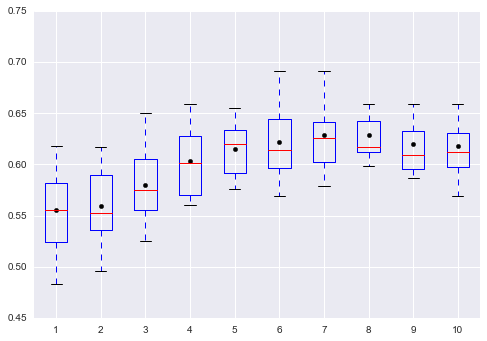

In [117]:
### Your boxplot code here ### 
grid_scores = gs.grid_scores_
scores = [x.cv_validation_scores  for x in grid_scores]
means = np.mean(scores, axis=1)
plt.boxplot(scores)
plt.scatter(k,means, c='k', zorder=2)


In [106]:
#help(grid_scores[0])

Write a short interpretation of the generated plot, answering the following questions:

* What trend do you see in the plot for increasing dimensions?

* Why do you think this is happening?

** Your answer here: **

#### Problem 3(d) 

**For AC209 Students**: Change the boxplot we generated above to also show the optimal value for $k$ chosen by the cross validation grid search. 

In [ ]:
### Your code here ### 

Write a short interpretation answering the following questions:

* Which trend do you observe for the optimal value of $k$?

* Why do you think this is happening?

** Your answer here: **

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---

# Submission Instructions

To submit your homework, create a folder named **lastname_firstinitial_hw#** and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code.  Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. *If we cannot access your work because these directions are not followed correctly, we will not grade your work.*
